In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape
import keras.backend as K
import math


#import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import os
from sklearn.model_selection import train_test_split


import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import os
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.image as mpimg
from  matplotlib import pyplot
import cv2
import random
from PIL import Image
from sklearn.utils import class_weight
import numpy
import codecs
import xmltodict

import imgaug as ia
from imgaug import augmenters as iaa
import math



import json
import numpy as np
import pandas as pd
from sklearn import preprocessing
import keras
from keras.layers import Input,Dense,Lambda,RepeatVector,Dot
from keras.models import Model
import os
import numpy as np
from keras.preprocessing import image as image_p
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.vgg16 import VGG16
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
import pickle
import matplotlib.image as mpimg
from keras.preprocessing import image
from  matplotlib import pyplot
from keras.layers.normalization import BatchNormalization
import cv2
import seaborn as sns
import random
from PIL import Image
from sklearn.utils import class_weight
from keras.layers import Reshape,merge,Concatenate,Add,Dropout
import keras.backend as K
import math
from keras.activations import softmax,tanh
import tensorflow as tf
from keras.applications.vgg16 import VGG16


from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D,MaxPooling2D,Flatten,Conv1D,Softmax
from keras.preprocessing import sequence

Using TensorFlow backend.


In [38]:
class CustomModelCheckpoint(ModelCheckpoint):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        self.epochs_since_last_save += 1
        if self.epochs_since_last_save >= self.period:
            self.epochs_since_last_save = 0
            filepath = self.filepath.format(epoch=epoch + 1, **logs)
            if self.save_best_only:
                current = logs.get(self.monitor)
                if current is None:
                    warnings.warn('Can save best model only with %s available, '
                                  'skipping.' % (self.monitor), RuntimeWarning)
                else:
                    if self.monitor_op(current, self.best):
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s improved from %0.5f to %0.5f,'
                                  ' saving model to %s'
                                  % (epoch + 1, self.monitor, self.best,
                                     current, filepath))
                        self.best = current
                        if self.save_weights_only:
                            #self.model.save_weights(filepath, overwrite=True)
                            print("asd")
                            try:
                                with open(filepath,'wb') as f:
                                    pickle.dump(self.model.get_weights(),f)
                            except Exception as ex:
                                print("Could not write",ex)
                        else:
                            self.model.save(filepath, overwrite=True)
                    else:
                        if self.verbose > 0:
                            print('\nEpoch %05d: %s did not improve from %0.5f' %
                                  (epoch + 1, self.monitor, self.best))
            else:
                if self.verbose > 0:
                    print('\nEpoch %05d: saving model to %s' % (epoch + 1, filepath))
                if self.save_weights_only:
                    self.model.save_weights(filepath, overwrite=True)
                else:
                    self.model.save(filepath, overwrite=True)

In [39]:
# !pip install keras
#num_labels = len(np.unique(labels))

def iou_metric(y_true, y_pred):
    # iou as metric for bounding box regression
    # input must be as [x1, y1, x2, y2]
    
    # AOG = Area of Groundtruth box
    AoG = K.abs(K.transpose(y_true)[2] - K.transpose(y_true)[0] + 1) * K.abs(K.transpose(y_true)[3] - K.transpose(y_true)[1] + 1)
    
    # AOP = Area of Predicted box
    AoP = K.abs(K.transpose(y_pred)[2] - K.transpose(y_pred)[0] + 1) * K.abs(K.transpose(y_pred)[3] - K.transpose(y_pred)[1] + 1)

    # overlaps are the co-ordinates of intersection box
    overlap_0 = K.maximum(K.transpose(y_true)[0], K.transpose(y_pred)[0])
    overlap_1 = K.maximum(K.transpose(y_true)[1], K.transpose(y_pred)[1])
    overlap_2 = K.minimum(K.transpose(y_true)[2], K.transpose(y_pred)[2])
    overlap_3 = K.minimum(K.transpose(y_true)[3], K.transpose(y_pred)[3])

    # intersection area
    intersection = (overlap_2 - overlap_0 + 1) * (overlap_3 - overlap_1 + 1)

    # area of union of both boxes
    union = AoG + AoP - intersection
    
    # iou calculation
    iou = intersection / union

    # bounding values of iou to (0,1)
    iou = K.clip(iou, 0.0 + K.epsilon(), 1.0 - K.epsilon())

    return iou    

In [40]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12648527271158857627, name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10036084746984531459
 physical_device_desc: "device: XLA_GPU device", name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1964607372135525345
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5406851072
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6239793421713064436
 physical_device_desc: "device: 0, name: GeForce GTX 1060 with Max-Q Design, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [41]:
def process_image_keypoints(img,bbox_coords):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    bbox_coordinates = []
    for a,b in bbox_coords:
        a = float(a)*ratio
        b = float(b)*ratio
        bbox_coordinates.append([a+left,b+top])
    return new_im,bbox_coordinates

In [42]:
def process_image_keypoints_nobox(img):
    desired_size = 224

    old_size = img.shape

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(img, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)

    return new_im,[left,top,ratio]

In [7]:
# count_correct = 0
# count_wrong = 0
# images = []
# bboxes = []
# image_sizes = []
# image_names = []
# for file in os.listdir("/tf/data/claw_annotations3/"):
#     try:
#         with open('/tf/data/claw_annotations3/'+file,'r') as f:
#             text = f.read()
#             d = xmltodict.parse(text)
#         path = d['annotation']['path']
#         rel_path = "/home/parmeet1992/Pictures/"
        
#         path = path.split(rel_path)[1]
#         path = "/tf/data/" + path
#         bgr_img = cv2.imread(path)
#         img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        
#         obj = d['annotation']['object'][0] if isinstance(d['annotation']['object'],list) else d['annotation']['object']
#         bbox = obj['bndbox']                
#         bbox_coords = [(bbox['xmin'],bbox['ymin']),(bbox['xmax'],bbox['ymax'])]


#         img,bbox_coords = process_image_keypoints(img,bbox_coords)
#         bbs = ia.BoundingBoxesOnImage([
#             ia.BoundingBox(x1=bbox_coords[0][0], y1=bbox_coords[0][1], x2=bbox_coords[1][0], y2=bbox_coords[1][1])
#         ], shape=img.shape)

#         images.append(img)
#         bboxes.append(bbs)
#         count_correct += 1
#     except Exception as ex:
#         print(ex)
#         count_wrong += 1

In [8]:
# idx = idx + 1
# plt.imshow(X_normalized[idx])

In [7]:
sometimes = lambda aug: iaa.Sometimes(0.5, aug)
seq = iaa.Sequential(
    [
        iaa.Fliplr(0.5), # horizontally flip 50% of all images
        iaa.Flipud(0.5), # vertically flip 50% of all images
        sometimes(iaa.Affine(
            #translate_percent={"x": (-0.01, 0.01), "y": (-0.01, 0.01)}, # translate by -20 to +20 percent (per axis)
            #rotate=(-5, 5), # rotate by -45 to +45 degrees
            order=[0, 1], # use nearest neighbour or bilinear interpolation (fast)
            cval=(0, 255), # if mode is constant, use a cval between 0 and 255
            mode=ia.ALL # use any of scikit-image's warping modes (see 2nd image from the top for examples)
        )),
        iaa.SomeOf((0, 5),
            [
                iaa.Sharpen(alpha=(0, 1.0), lightness=(0.75, 1.5)), # sharpen images
                #iaa.Add((-10, 10), per_channel=0.5), # change brightness of images (by -10 to 10 of original value)
                iaa.ContrastNormalization((0.9, 1.10), per_channel=0.5), # improve or worsen the contrast
            ],
            random_order=True
        )
    ],
    random_order=True
)

In [8]:
def augment_images(images,bboxes,times):
    all_bboxes = []
    
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    all_images = list(images)
    
    for bbs in bboxes:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    #print(len(all_images))
    #print(len(all_bboxes))
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        bbs_aug = seq_det.augment_bounding_boxes(bboxes)
        for bbs in bbs_aug:
            all_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
        
        all_images = all_images + list(image_aug)
        #all_image_sizes = all_image_sizes + list(image_sizes)
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_bboxes

In [11]:
# X_normalized = [(x[:,:,:].astype(np.float64)) / 255.0 for x in images]
# X_train, X_test, y_train, y_test = train_test_split(X_normalized,bboxes,test_size=0.33,random_state=42,shuffle=True)
# test_bboxes = []
# for bbs in list(y_test):
#     test_bboxes.append(np.array([bbs.bounding_boxes[0].x1,bbs.bounding_boxes[0].y1,bbs.bounding_boxes[0].x2,bbs.bounding_boxes[0].y2]))
    
# train_images,train_bboxes = augment_images(X_train,y_train,2)

In [12]:
# cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

# for layer in cnn_base.layers:
#     if layer.name=='block5_conv3':
#         break
#     layer.trainable = False

# x = cnn_base.get_layer('block5_pool').output
# x = Conv2D(128, kernel_size=(3, 3), padding="same")(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.2)(x)
# x = Conv2D(128, kernel_size=(3, 3), padding="same")(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.2)(x)
# x = Conv2D(4, kernel_size=(1, 1), padding="same")(x)
# x = Reshape((4,),name='localization_output')(x)


# model = Model(inputs=cnn_base.input, outputs=x)
# model.compile(loss="mean_squared_error", optimizer="adam", metrics=['accuracy',iou_metric])
# initial_weights = model.get_weights()

In [13]:
# model.summary()

In [14]:
# try:
#     with open('vgg16-crusher-box-weights_16.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         model.set_weights(model_weights)
#         print("loaded weights")
# except:
#     print("not present")
# checkpoint = CustomModelCheckpoint('vgg16-crusher-box-weights_16.hd5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True,mode='min')
# callbacks_list = [checkpoint]
# history = model.fit(np.array(train_images),np.array(train_bboxes),validation_data=(np.array(X_test),np.array(test_bboxes)),epochs=20,batch_size=5,callbacks=callbacks_list)

In [15]:
# with open('vgg16-crusher-box-weights_16.hd5','rb') as f:
#     model_weights = pickle.load(f)
#     model.set_weights(model_weights)
#     print("loaded weights")

In [16]:
labels_dict

NameError: name 'labels_dict' is not defined

In [12]:
df = pd.read_csv('/tf/data/labels.csv')
labels_dict = {}

for idx,row in df.iterrows():
    labels_dict[row['id']] = row['posture']

In [10]:
count_correct = 0
count_wrong = 0
images = []
labels = []
image_sizes = []
image_names = []


# folders = ['/tf/data/aggression/tangier_lobster/']
# for folder in folders:
#     for file in os.listdir(folder):
#         try:
#             bgr_img = cv2.imread(folder+"/"+file)
#             img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
#             label = file.split(".")[0].split("_")[0]
            
#             img_temp,corr = process_image_keypoints_nobox(img)
#             img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            
#             [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
#             [left,top,ratio] = corr
#             xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
#             ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
#             img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
#             image_temp,_= process_image_keypoints_nobox(img)
#             if 'visit1'+label in labels_dict:
#                 images.append(image_temp)
#                 labels.append(labels_dict['visit1'+label])
#             count_correct += 1
#         except Exception as ex:
#             print(ex)
#             count_wrong += 1

folders = ['/tf/data/side-view/tangier-visit2']
for folder in folders:
    for file in os.listdir(folder):
        try:
            bgr_img = cv2.imread(folder+"/"+file)
            label = file.split(".")[0].split("_")[0]
            #print(label)
            
            img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
#             img_temp,corr = process_image_keypoints_nobox(img)
#             img_temp = (img_temp[:,:,:] / 255.0).astype(np.float64)
            
#             [[xmin,ymin,xmax,ymax]] = model.predict(np.expand_dims(img_temp,0))
#             [left,top,ratio] = corr
#             xmin,xmax = (xmin - left)/ratio,(xmax - left)/ratio
#             ymin,ymax = (ymin - top)/ratio,(ymax - top)/ratio            
            
#             img = img[int(ymin):int(ymax),int(xmin):int(xmax),:]
            image_temp,_= process_image_keypoints_nobox(img)
            #if label in labels_dict:
            images.append(image_temp)
            labels.append(labels_dict[int(label)])
            count_correct += 1
        except Exception as ex:
            print(ex)
            count_wrong += 1

In [24]:
# idx = idx + 1
# plt.imshow(images[idx])
#print(len(images))
sum([lab==1.0 for lab in labels])

79

In [25]:
def augment_images(images,labels,times):
    
    images = [(x[:,:,:] * 255.0).astype(np.uint8) for x in images]
    
    all_images = list(images)
    all_labels = list(labels)
    
    
    
    for i in range(times):
        seq_det = seq.to_deterministic()
        image_aug = seq_det.augment_images(images)
        all_images = all_images + list(image_aug)
        all_labels = all_labels + list(labels)        
    all_images = [(x[:,:,:] / 255.0).astype(np.float64) for x in all_images]
    return all_images,all_labels

In [26]:
images_temp = [(x[:,:,:] / 255.0).astype(np.float64) for x in images]

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=5,shuffle=False,random_state=100)
test_cvscores = []
validation_cvscores = []
fusion_model_info = []
kfold_data = []

i = 0
for train, test in kf.split(images_temp,labels):
    i = i + 1
    print(i)
    train_images,train_labels = augment_images(np.array(images_temp)[train],np.array(labels)[train],2)
    kfold_data.append([train_images,train_labels,np.array(images_temp)[test],np.array(labels)[test]])

1
2
3
4
5


In [27]:
with open('data-pose0.pckl','wb') as file:
    pickle.dump(kfold_data[0],file)
with open('data-pose1.pckl','wb') as file:
    pickle.dump(kfold_data[1],file)
with open('data-pose2.pckl','wb') as file:
    pickle.dump(kfold_data[2],file)
with open('data-pose3.pckl','wb') as file:
    pickle.dump(kfold_data[3],file)
with open('data-pose4.pckl','wb') as file:
    pickle.dump(kfold_data[4],file)

In [25]:
with open('data-pose0.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)

In [43]:
def attention_block(x,K,labels,w,h,layer_name):
    H = Conv2D(K, kernel_size=(w, h), padding="same",name=layer_name)(x)
    H = BatchNormalization()(H)
    spatial_softmax = Lambda(lambda x:softmax(H,axis=3))(H)
    O = Conv2D(labels*K, kernel_size=(w, h), padding="same")(x)
    O = BatchNormalization()(O)
    rH = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=3))(spatial_softmax)
    o = Lambda(lambda x: tf.einsum('bijk,bijk->bk',x[0],x[1]))([O,rH])
    tempH = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    tempH = BatchNormalization()(tempH)
    gh = Lambda(lambda x: softmax(tanh(tf.einsum('bijk,bijk->bk',x[0],x[1])),axis=1))([tempH,spatial_softmax])
    rgh = Lambda(lambda x:keras.backend.repeat_elements(x, rep=labels, axis=1))(gh)
    of = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([rgh,o])
    new_shape = Reshape((labels,K))(of)
    out = Lambda(lambda x: keras.backend.sum(x,axis=2))(new_shape)
    out = BatchNormalization()(out)
    out = Dense(labels,activation='sigmoid')(out)
    #x = Conv2D(K, kernel_size=(w, h), padding="same")(x)
    #inter = Lambda(lambda x: Flatten()(keras.backend.mean(x,axis=3)))(x)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(x)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    inter = Conv2D(128, kernel_size=(w, h), padding="same")(inter)
    inter = MaxPooling2D(pool_size=(2, 2))(inter)
    inter = BatchNormalization()(inter)
    print(inter.shape)
    inter = Conv2D(1, kernel_size=(w, h), padding="same")(inter)
    inter = Flatten()(inter)
    weight = Dense(labels,activation='tanh')(inter)
    return out,weight

In [44]:
# len(train_labels)

In [45]:
# len(test_labels)

In [6]:
K = 5
labels = 1
w,h = 3,3

cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False


x = cnn_base.get_layer('block3_conv3').output
final1,weight1 = attention_block(x,K,labels,w,h,"layer1")
#final1 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final1,weight1])

x = cnn_base.get_layer('block4_conv3').output
final2,weight2 = attention_block(x,K,labels,w,h,"layer2")

#final2 = Lambda(lambda x: tf.einsum('bk,bk->bk',x[0],x[1]))([final2,weight2])

x = cnn_base.get_layer('block5_pool').output
inter = Lambda(lambda x: Flatten()(x[:,:,:,0]))(x)
weight3 = Dense(1,activation='tanh')(inter)

x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1,activation='sigmoid')(x)


weight_concat = Concatenate()([weight1,weight2,weight3])
weight_concat = Reshape((labels,3))(weight_concat)
weight_concat = Softmax(axis=2)(weight_concat)

final = Concatenate()([final1,final2,x])
final = Reshape((labels,3))(final)


sum_final = Lambda(lambda x: tf.einsum('bij,bij->bij',x[0],x[1]))([weight_concat,final])
sum_final = Lambda(lambda x: keras.backend.sum(x,axis=2))(sum_final)
sum_final = Dense(labels,activation='sigmoid')(sum_final)

model = Model(inputs=cnn_base.input, outputs=sum_final)

#adam = keras.optimizers.Adam(lr=0.0001)
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

W0524 02:00:12.424801 140235658884864 deprecation.py:506] From /usr/local/lib/python3.5/dist-packages/tensorflow/python/training/moving_averages.py:211: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


(?, 14, 14, 128)
(?, 7, 7, 128)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 64) 36928       block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 64) 0           block1_conv2[0][0]               
_____________________________________________________________________________

In [11]:
###### history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []

history_record = []

for i in range(5):
    eps = 100
    #eps = 70
    print("Loading file")
    with open('data-pose'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('posture-classification-attentionfinal10'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    train_ls = []
    for lb in train_labels:
        if lb==1.0:
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb==1.0:
            test_ls.append(1)
        else:
            test_ls.append(0)
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_ls),train_ls)
    checkpoint = CustomModelCheckpoint('posture-classification-attentionfinal10'+str(i)+'.hd5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=15, verbose=0, mode='min', baseline=None, restore_best_weights=False)
    callbacks_list = [checkpoint,earlyStopping]
    history = model.fit(x=np.array(train_images),y=np.array(train_ls),batch_size=20,epochs=eps,
        validation_data=(np.array(test_images),np.array(test_ls)),callbacks=callbacks_list,class_weight=class_weights)

Loading file
setting initial weights
loaded
Train on 546 samples, validate on 46 samples
Epoch 1/100
546/546 [==============================] - 17s 31ms/step - loss: 0.6263 - acc: 0.6538 - val_loss: 0.6674 - val_acc: 0.6522

Epoch 00001: val_acc improved from -inf to 0.65217, saving model to posture-classification-attentionfinal100.hd5
asd
Epoch 2/100
546/546 [==============================] - 9s 16ms/step - loss: 0.5569 - acc: 0.6538 - val_loss: 0.5190 - val_acc: 0.6522

Epoch 00002: val_acc did not improve from 0.65217
Epoch 3/100
546/546 [==============================] - 9s 16ms/step - loss: 0.5147 - acc: 0.6538 - val_loss: 0.4882 - val_acc: 0.6522

Epoch 00003: val_acc did not improve from 0.65217
Epoch 4/100
546/546 [==============================] - 9s 16ms/step - loss: 0.4926 - acc: 0.6538 - val_loss: 0.4917 - val_acc: 0.6522

Epoch 00004: val_acc did not improve from 0.65217
Epoch 5/100
546/546 [==============================] - 9s 16ms/step - loss: 0.4775 - acc: 0.6538 - val_

KeyboardInterrupt: 

In [70]:
test_predictions = model.predict(np.array(test_images))

In [150]:
labs = []
for i in (test_predictions>0.5):
    labs.append(i[0])
numpy.where((labs==test_labels)== 0)[0]

array([ 7, 11, 12, 18, 23, 24, 29])

1.0


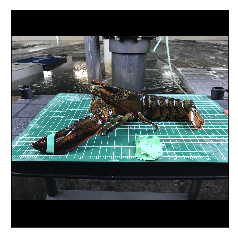

In [187]:
idx = 23
plt.imshow(test_images[idx])
plt.xticks([])
plt.yticks([])
plt.savefig("posture_incorrect_aggressive2.jpg")
print(test_labels[idx])

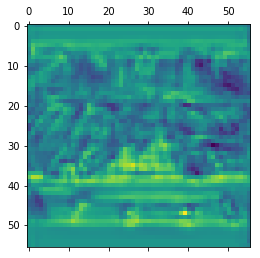

In [69]:
idx = idx + 1
layer_name = 'layer1'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(np.expand_dims(np.array(train_images[idx]),0))
plt.matshow(intermediate_output[0, :, :, 4], cmap='viridis')
#plt.savefig('image45_map2.jpg')

In [12]:
from sklearn.metrics import confusion_matrix
matrix = []
C_sum = np.zeros(3)

for i in range(5):
    with open('data-pose'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('posture-classification-attention-adam-0001'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    #test_predictions = test_pred[i]
#test_f1.append(f1_score(test_labels,np.argmax(test_predictions,axis=1),average='macro'))
#test_accuracy.append(accuracy_score(test_labels,np.argmax(test_predictions,axis=1)))

#train_predictions = model.predict(x=np.array(train_images),batch_size=5)
# train_predictions = np.argmax(train_pred[i],axis=1)
# train_f1.append(f1_score(train_labels,train_predictions,average='macro'))
# train_accuracy.append(accuracy_score(train_labels,train_predictions))
    test_predictions = model.predict(x=np.array(test_images),batch_size=5)
    C = confusion_matrix(np.array(test_labels), np.argmax(test_predictions,axis=1))
    matrix.append(C / C.astype(np.float).sum(axis=1).reshape(2,1))
    
confusion_matrix = C_sum/5

# cm_df = pd.DataFrame(confusion_matrix,
#                      index = ['closed','partial','open'], 
#                      columns = ['closed','partial','open'])

# plt.figure(figsize=(8,6))
# sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 15})
# #plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
# plt.ylabel('True label')
# plt.xlabel('Predicted label')
# plt.savefig('tail-confusion-matrix-attention.jpg')
# plt.show()

loaded model
loaded model
loaded model
loaded model
loaded model


array([[29,  0],
       [15,  0]])

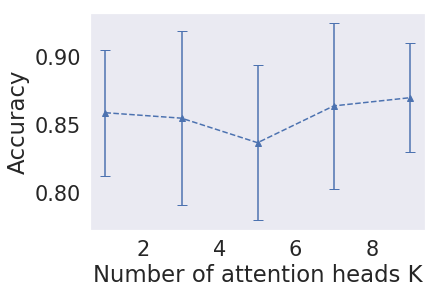

In [35]:
#plt.rcParams.update({'font.size': 22})
plt.errorbar([1,3,5,7,9],[0.859,0.855,0.837,0.864,0.87],[0.0462,0.064,0.057,0.061,0.04],label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K")
plt.ylabel("Accuracy")
plt.grid()
plt.savefig('posture-choose-attention-headk.jpg')
plt.show()

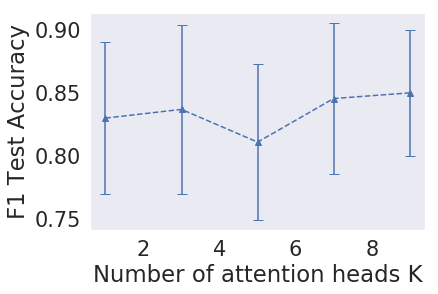

In [36]:
plt.errorbar([1,3,5,7,9],[0.83,0.8369,0.811,0.8455,0.85],[0.06,0.0671,0.062,0.06,0.05],label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K")
plt.ylabel("F1 Test Accuracy")
plt.grid()
plt.savefig('posture-choose-attention-headk-f1.jpg')
plt.show()

In [39]:
test_accuracy

[0.9347826086956522,
 0.8478260869565217,
 0.8043478260869565,
 0.8260869565217391,
 0.8863636363636364]

In [41]:
from scipy import stats
rvs1 = [0.9347826086956522,
 0.8478260869565217,
 0.7608695652173914,
 0.8043478260869565,
 0.8409090909090909]
rvs2 = [0.9347826086956522,
 0.8478260869565217,
 0.8043478260869565,
 0.8260869565217391,
 0.8863636363636364]
stats.ttest_ind(rvs1,rvs2, equal_var = True)

Ttest_indResult(statistic=-0.5998058978012277, pvalue=0.5652332087314194)

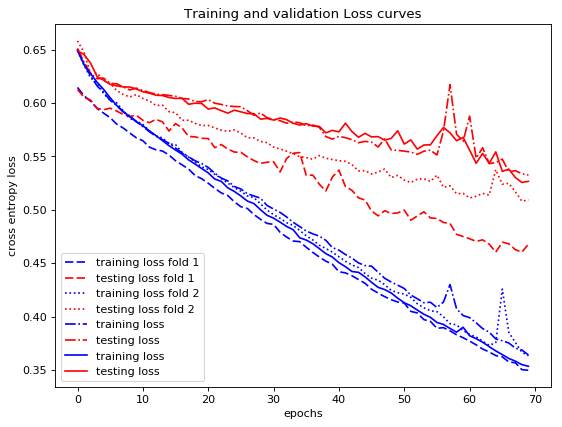

In [78]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(history_record[0].history['loss'],color='b',label='training loss fold 1',linestyle='--',dashes = (5,2))
plt.plot(history_record[0].history['val_loss'],color='r',label='testing loss fold 1',linestyle='--',dashes = (5,2))

plt.plot(history_record[1].history['loss'],color='b',label='training loss fold 2',linestyle=':')
plt.plot(history_record[1].history['val_loss'],color='r',label='testing loss fold 2',linestyle=':')

plt.plot(history_record[2].history['loss'],color='b',label='training loss',linestyle='-.')
plt.plot(history_record[2].history['val_loss'],color='r',label='testing loss',linestyle='-.')

plt.plot(history_record[3].history['loss'],color='b',label='training loss',linestyle='-')
plt.plot(history_record[3].history['val_loss'],color='r',label='testing loss',linestyle='-')

#plt.plot(history_record[4].history['loss'],color='b',label='training loss')
#plt.plot(history_record[4].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
#figure(figsize(10,10))
plt.legend()
plt.savefig('posture-curves-attention-sgdk5.jpg')
plt.show()

In [79]:
history_record_attention_sgd = [history_record[0].history,history_record[1].history,
                                history_record[2].history,history_record[3].history,history_record[4].history]
with open('history_attention_sgd_posture001_dropout004relu','wb') as f:
    pickle.dump(history_record_attention_sgd,f)
    print("dumped")

dumped


In [31]:
history_record_attention_sgd = history

In [205]:
plt.plot(history_record[2].history['acc'],color='b',label='training accuracy')
plt.plot(history_record[2].history['val_acc'],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('posture-accuracy-attention.jpg')
plt.show()

IndexError: list index out of range

In [ ]:
asd

In [59]:
hist = []
with open('history_attention_sgd_posture0.001','rb') as f:
    hist = pickle.load(f)
    print("load")

load


In [86]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-pose'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('posture-classification-attention-adam-k5-01'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    train_ls = []
    for lb in train_labels:
        if lb==1.0:
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb==1.0:
            test_ls.append(1)
        else:
            test_ls.append(0)

    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_ls,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_ls,test_predictions>0.5))

loaded model
loaded model
loaded model
loaded model


In [87]:
test_accuracy

[0.8478260869565217,
 0.7608695652173914,
 0.6956521739130435,
 0.7608695652173914]

In [88]:
#k=1
print(np.mean(test_accuracy))
print(np.mean(test_f1))

print(np.std(test_accuracy))
print(np.std(test_f1))

0.7663043478260869
0.6800246515171888
0.054075404190577166
0.1045123652003093


In [33]:
test_accuracy

[0.8913043478260869,
 0.8478260869565217,
 0.7608695652173914,
 0.782608695652174,
 0.7045454545454546]

In [178]:
mean_list_acc[0:5]+[np.mean(test_accuracy)]+mean_list_acc[5:8]

[0.7895256916996047,
 0.7814229249011858,
 0.8075098814229248,
 0.8201581027667985,
 0.8424901185770752,
 0.8422924901185771,
 0.8381422924901185,
 0.8337944664031621]

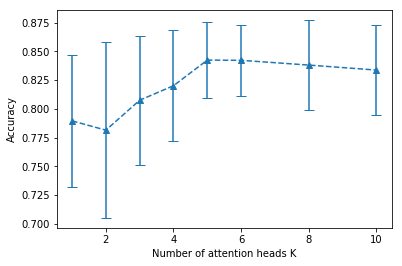

In [192]:
plt.errorbar([1,2,3,4,5,6,8,10],mean_list_acc[0:5]+[np.mean(test_accuracy)]+mean_list_acc[5:8],std_list_acc[0:5]+[np.std(test_accuracy)]+std_list_acc[5:8],label='Test accuracy',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K")
plt.ylabel("Accuracy")
plt.savefig('posture-choose-attention-headk.jpg')
plt.show()

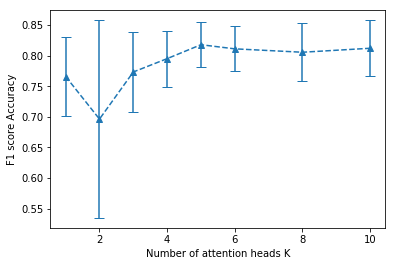

In [196]:
plt.errorbar([1,2,3,4,5,6,8,10],mean_list_f1[0:5]+[np.mean(test_f1)]+mean_list_f1[5:8],std_list_f1[0:4]+[np.std(test_f1),np.std(test_f1)]+std_list_f1[5:8],label='Test f1 score',linestyle='--', marker='^',capsize=5)
plt.xlabel("Number of attention heads K")
plt.ylabel("F1 score Accuracy")
plt.savefig('posture-choose-attention-headk-f1.jpg')
plt.show()

In [ ]:
from scipy import stats
rvs1 = [0.8260869565217391,
 0.782608695652174,
 0.7391304347826086,
 0.782608695652174,
 0.8409090909090909]
rvs2 = [0.8695652173913043,
 0.782608695652174,
 0.782608695652174,
 0.8695652173913043,
 0.8181818181818182]
stats.ttest_ind(rvs1,rvs2, equal_var = False)

In [15]:
labels = 3
cnn_base = VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')

for layer in cnn_base.layers:
    #if layer.name=='block5_conv3':
        #break
    layer.trainable = False
x = cnn_base.get_layer('block5_pool').output
x = Flatten()(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(64,activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(labels,activation='sigmoid')(x)


model = Model(inputs=cnn_base.input, outputs=x)

sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
#adam = keras.optimizers.Adam(lr=0.01)
model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])
print(model.summary())
initial_weights = model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [45]:
history_record = []
train_pred = []
test_pred = []

train_scores = []
test_scores = []

initial_train_scores = []
initial_test_scores = []



for i in range(5):
    print("Loading file")
    with open('data-pose'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    try:
        with open('posture-classification-simple-final'+str(i)+'.hd5','rb') as f:
            model_weights = pickle.load(f)
            print("loaded model")
    except:
        print("setting initial weights")
        model_weights = initial_weights
    model.set_weights(model_weights)
    print("loaded")
    train_ls = []
    for lb in train_labels:
        if lb==1.0:
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb==1.0:
            test_ls.append(1)
        else:
            test_ls.append(0)
    class_weights = class_weight.compute_class_weight('balanced',np.unique(train_ls),train_ls)
    checkpoint = CustomModelCheckpoint('posture-classification-simple-final'+str(i)+'.hd5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=True,mode='max')
    earlyStopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
    callbacks_list = [checkpoint,earlyStopping]
    history = model.fit(x=np.array(train_images),y=np.array(train_ls),batch_size=5,epochs=40,
        validation_data=(np.array(test_images),np.array(test_ls)),callbacks=callbacks_list,class_weight=class_weights)
    history_record.append(history)
#     train_score = model.evaluate(x=np.array(train_images),y=np.array(train_ls),batch_size=5)
#     test_score = model.evaluate(x=np.array(test_images),y=np.array(test_ls),batch_size=5)
#     train_scores.append(train_score)
#     test_scores.append(test_score)
    
#     print("predicting")
#     print("Test Score",test_score)
#     train_predictions = model.predict(x=np.array(train_images),batch_size=50)
#     test_predictions = model.predict(x=np.array(test_images),batch_size=50)
    
#     train_pred.append(train_predictions)
#     test_pred.append(test_predictions)

Loading file
loaded model
loaded
Train on 546 samples, validate on 46 samples
Epoch 1/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2067 - acc: 0.9194 - val_loss: 2.1558 - val_acc: 0.6522

Epoch 00001: val_acc improved from -inf to 0.65217, saving model to posture-classification-simple-final0.hd5
asd
Epoch 2/40
546/546 [==============================] - 5s 8ms/step - loss: 0.1625 - acc: 0.9396 - val_loss: 1.0062 - val_acc: 0.6957

Epoch 00002: val_acc improved from 0.65217 to 0.69565, saving model to posture-classification-simple-final0.hd5
asd
Epoch 3/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2370 - acc: 0.9158 - val_loss: 0.5064 - val_acc: 0.7826

Epoch 00003: val_acc improved from 0.69565 to 0.78261, saving model to posture-classification-simple-final0.hd5
asd
Epoch 4/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2055 - acc: 0.9249 - val_loss: 0.7412 - val_acc: 0.7174

Epoch 00004: val_acc did not improve from 0.7

Epoch 5/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2994 - acc: 0.8681 - val_loss: 0.4155 - val_acc: 0.8043

Epoch 00005: val_acc improved from 0.78261 to 0.80435, saving model to posture-classification-simple-final2.hd5
asd
Epoch 6/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2547 - acc: 0.8864 - val_loss: 1.0012 - val_acc: 0.6304

Epoch 00006: val_acc did not improve from 0.80435
Epoch 7/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2181 - acc: 0.9139 - val_loss: 0.5701 - val_acc: 0.7391

Epoch 00007: val_acc did not improve from 0.80435
Epoch 8/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2318 - acc: 0.9029 - val_loss: 0.5772 - val_acc: 0.7609

Epoch 00008: val_acc did not improve from 0.80435
Epoch 9/40
546/546 [==============================] - 5s 8ms/step - loss: 0.2101 - acc: 0.9194 - val_loss: 0.5135 - val_acc: 0.7391

Epoch 00009: val_acc did not improve from 0.80435
Epoch 10/40
546/546

KeyboardInterrupt: 

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,accuracy_score
test_accuracy = []
train_accuracy = []

test_f1 = []
train_f1 = []

for i in range(5):
    with open('data-pose'+str(i)+'.pckl','rb') as file:
        train_images,train_labels,test_images,test_labels = pickle.load(file)
    with open('posture-classification-simple-final'+str(i)+'.hd5','rb') as f:
        model_weights = pickle.load(f)
        print("loaded model")
    model.set_weights(model_weights)
    train_ls = []
    for lb in train_labels:
        if lb==1.0:
            train_ls.append(1)
        else:
            train_ls.append(0)
    test_ls = []
    for lb in test_labels:
        if lb==1.0:
            test_ls.append(1)
        else:
            test_ls.append(0)

    test_predictions = model.predict(np.array(test_images))
    test_f1.append(f1_score(test_ls,test_predictions>0.5,average='macro'))
    test_accuracy.append(accuracy_score(test_ls,test_predictions>0.5))

    train_predictions = model.predict(np.array(train_images))
    train_f1.append(f1_score(train_ls,train_predictions>0.5,average='macro'))
    train_accuracy.append(accuracy_score(train_ls,train_predictions>0.5))

loaded model
loaded model
loaded model
loaded model
loaded model


In [48]:
test_accuracy

[0.9130434782608695,
 0.8478260869565217,
 0.8043478260869565,
 0.8043478260869565,
 0.8636363636363636]

In [47]:
print("Training accuracy mean",np.mean(train_accuracy))
print("Training accuracy var",np.std(train_accuracy))

print("Testing accuracy mean",np.mean(test_accuracy))
print("Testing accuracy var",np.std(test_accuracy))

print("Training f1 mean",np.mean(train_f1))
print("Training f1 var",np.std(train_f1))

print("Testing f1 mean",np.mean(test_f1))
print("Testing f1 var",np.std(test_f1))

Training accuracy mean 0.9524287306896003
Training accuracy var 0.04651917873080497
Testing accuracy mean 0.8466403162055336
Testing accuracy var 0.04068651140698107
Training f1 mean 0.9446059389255194
Training f1 var 0.05540640693051436
Testing f1 mean 0.8147859227093097
Testing f1 var 0.05052605185328045


In [49]:
from scipy import stats
rvs1 = [0.9130434782608695,
 0.8478260869565217,
 0.8043478260869565,
 0.8043478260869565,
 0.8636363636363636]
rvs2 = [0.8695652173913043,
 0.782608695652174,
 0.782608695652174,
 0.8695652173913043,
 0.8181818181818182]
stats.ttest_ind(rvs1,rvs2, equal_var = False)

Ttest_indResult(statistic=0.7853125689017902, pvalue=0.45493517961767016)

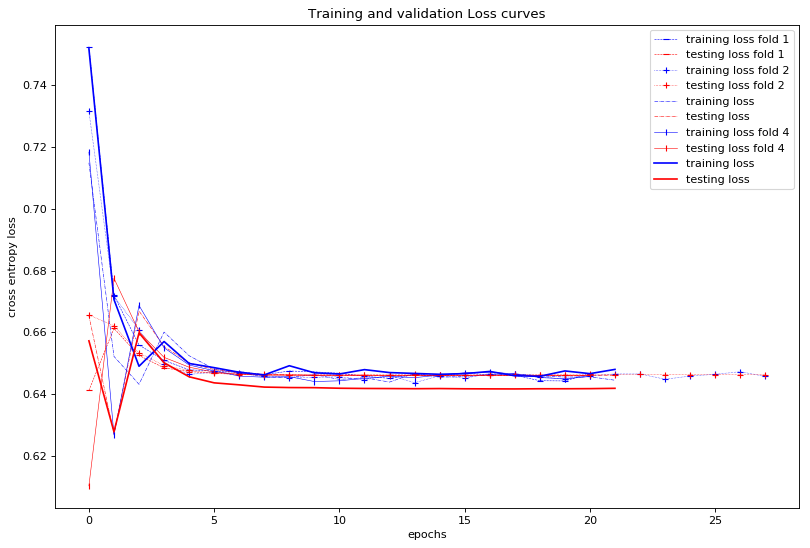

In [90]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(history_record[0].history['loss'],color='b',label='training loss fold 1',linestyle='--',linewidth=0.5,marker="*",markersize=5)
#plt.plot(history_record[0].history['val_loss'],color='r',label='testing loss fold 1',linestyle='--',linewidth=0.5,marker="*",markersize=5)
plt.plot(history_record[0].history['loss'],color='b',label='training loss fold 1',linestyle='--',linewidth=0.5,marker="_",markersize=5)
plt.plot(history_record[0].history['val_loss'],color='r',label='testing loss fold 1',linestyle='--',linewidth=0.5,marker="_",markersize=5)


# plt.plot(history_record[1].history['loss'],color='b',label='training loss fold 2',linestyle=':',linewidth=0.5,marker="+",markersize=5)
# plt.plot(history_record[1].history['val_loss'],color='r',label='testing loss fold 2',linestyle=':',linewidth=0.5,marker="+",markersize=5)
plt.plot(history_record[1].history['loss'],color='b',label='training loss fold 2',linestyle=':',linewidth=0.5,marker="+",markersize=5)
plt.plot(history_record[1].history['val_loss'],color='r',label='testing loss fold 2',linestyle=':',linewidth=0.5,marker="+",markersize=5)


# plt.plot(history_record[2].history['loss'],color='b',label='training loss fold 3',linestyle='-.',linewidth=0.5,marker="x",markersize=5)
# plt.plot(history_record[2].history['val_loss'],color='r',label='testing loss fold 3',linestyle='-.',linewidth=0.5,marker="x",markersize=5)
plt.plot(history_record[2].history['loss'],color='b',label='training loss',linestyle='-.',linewidth=0.5)
plt.plot(history_record[2].history['val_loss'],color='r',label='testing loss',linestyle='-.',linewidth=0.5)


plt.plot(history_record[3].history['loss'],color='b',label='training loss fold 4',linestyle='-',linewidth=0.5,marker="|",markersize=5)
plt.plot(history_record[3].history['val_loss'],color='r',label='testing loss fold 4',linestyle='-',linewidth=0.5,marker="|",markersize=5)

plt.plot(history_record[4].history['loss'],color='b',label='training loss')
plt.plot(history_record[4].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
#figure(figsize(10,10))
plt.legend()
plt.savefig('posture-curves-simple-sgd-0.01.jpg')
plt.show()

In [91]:
history_record_simple_sgd001_relu_dropout04 = [history_record[0].history,history_record[1].history,
                                history_record[2].history,history_record[3].history,history_record[4].history]
with open('history_record_simple_sgd001_relu_dropout04','wb') as f:
    pickle.dump(history_record_simple_sgd001_relu_dropout04,f)
    print("dumped")

dumped


In [114]:
hist1 = []
with open('history_attention_sgd_posture001_dropout004relu','rb') as f:
    hist1 = pickle.load(f)
    print("load")
hist2 = []
with open('history_simple-adam-relu-dropout0.4','rb') as f:
    hist2 = pickle.load(f)
    print("load")    
hist3 = []
with open('history_record_simple_sgd001_relu_dropout04','rb') as f:
    hist3 = pickle.load(f)
    print("load")
with open('history_simple-sgd001-relu-dropout0.2','rb') as f:
    hist4 = pickle.load(f)
    print("load")
with open('history_simple-adam-tanh-batch','rb') as f:
    hist5 = pickle.load(f)
    print("load")        
#history_record_simple_sgd001_relu_dropout04    

load
load
load
load
load


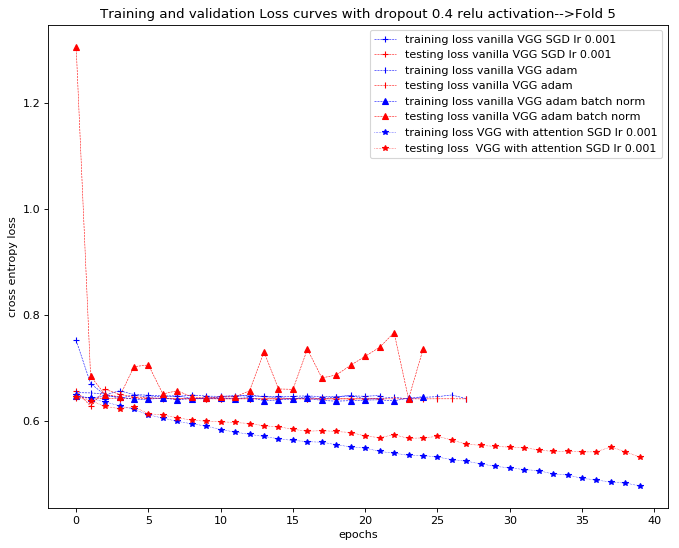

In [134]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
#plt.plot(history_record[0].history['loss'],color='b',label='training loss fold 1',linestyle='--',linewidth=0.5,marker="*",markersize=5)
#plt.plot(history_record[0].history['val_loss'],color='r',label='testing loss fold 1',linestyle='--',linewidth=0.5,marker="*",markersize=5)
idx = 4

# plt.plot(hist5[idx]['loss'],color='b',label='training loss attention VGG 0.01',linestyle='--',linewidth=0.5,marker="*",markersize=5)
# plt.plot(hist5[idx]['val_loss'],color='r',label='testing loss attention VGG 0.01',linestyle='--',linewidth=0.5,marker="*",markersize=5)

# plt.plot(hist4[idx]['loss'],color='b',label='training loss vanilla VGG 0.01',linestyle='--',linewidth=0.5,marker="_",markersize=5)
# plt.plot(hist4[idx]['val_loss'],color='r',label='testing loss vanilla VGG 0.01',linestyle='--',linewidth=0.5,marker="_",markersize=5)


# plt.plot(hist3[idx]['loss'],color='b',label='training loss vanilla VGG 0.001',linestyle='--',linewidth=0.5)
# plt.plot(hist3[idx]['val_loss'],color='r',label='testing loss vanilla VGG 0.001',linestyle='--',linewidth=0.5)

plt.plot(hist3[idx]['loss'],color='b',label='training loss vanilla VGG SGD lr 0.001',linestyle='--',linewidth=0.5,marker="+",markersize=5)
plt.plot(hist3[idx]['val_loss'],color='r',label='testing loss vanilla VGG SGD lr 0.001',linestyle='--',linewidth=0.5,marker="+",markersize=5)


plt.plot(hist2[idx]['loss'][10:],color='b',label='training loss vanilla VGG adam',linestyle='--',linewidth=0.5,marker="|",markersize=5)
plt.plot(hist2[idx]['val_loss'][10:],color='r',label='testing loss vanilla VGG adam',linestyle='--',linewidth=0.5,marker="|",markersize=5)

plt.plot(hist5[idx]['loss'][5:30],color='b',label='training loss vanilla VGG adam batch norm',linestyle='--',linewidth=0.5,marker="^",markersize=5)
plt.plot(hist5[idx]['val_loss'][5:30],color='r',label='testing loss vanilla VGG adam batch norm',linestyle='--',linewidth=0.5,marker="^",markersize=5)


# # # plt.plot(history_record[1].history['loss'],color='b',label='training loss fold 2',linestyle=':',linewidth=0.5,marker="+",markersize=5)
# # # plt.plot(history_record[1].history['val_loss'],color='r',label='testing loss fold 2',linestyle=':',linewidth=0.5,marker="+",markersize=5)
plt.plot(hist1[idx]['loss'][:40],color='b',label='training loss VGG with attention SGD lr 0.001',linestyle=':',linewidth=0.5,marker="*",markersize=5)
plt.plot(hist1[idx]['val_loss'][:40],color='r',label='testing loss  VGG with attention SGD lr 0.001',linestyle=':',linewidth=0.5,marker="*",markersize=5)

# plt.plot(hist4[idx]['loss'][:5],color='b',label='training loss VGG with attention lr 0.001',linestyle=':',linewidth=0.5,marker="_",markersize=5)
# plt.plot(hist4[idx]['val_loss'][:5],color='r',label='testing loss  VGG with attention lr 0.001',linestyle=':',linewidth=0.5,marker="_",markersize=5)

# plt.plot(history_record[2].history['loss'],color='b',label='training loss fold 3',linestyle='-.',linewidth=0.5,marker="x",markersize=5)
# plt.plot(history_record[2].history['val_loss'],color='r',label='testing loss fold 3',linestyle='-.',linewidth=0.5,marker="x",markersize=5)
# # plt.plot(history_record[2].history['loss'],color='b',label='training loss',linestyle='-.',linewidth=0.5)
# # plt.plot(history_record[2].history['val_loss'],color='r',label='testing loss',linestyle='-.',linewidth=0.5)


# plt.plot(history_record[3].history['loss'],color='b',label='training loss fold 4',linestyle='-',linewidth=0.5,marker="|",markersize=5)
# plt.plot(history_record[3].history['val_loss'],color='r',label='testing loss fold 4',linestyle='-',linewidth=0.5,marker="|",markersize=5)

# plt.plot(history_record[4].history['loss'],color='b',label='training loss')
# plt.plot(history_record[4].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves with dropout 0.4 relu activation-->Fold '+str(idx+1))
#figure(figsize(10,10))
plt.legend()
plt.savefig('posture-curves-sgd-lr-0.01-fold-relu-dropout-0.4'+str(idx+1)+'.jpg')
plt.show()

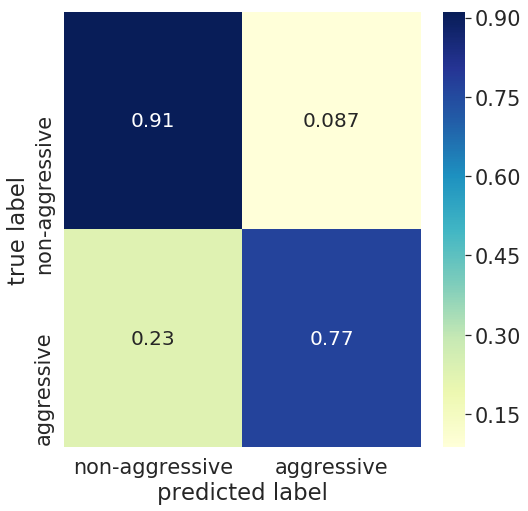

In [25]:
from sklearn.metrics import confusion_matrix
sns.set(font_scale=1.9)
# C_sum = np.zeros(2)

# for i in range(5):    
#     with open('data-pose'+str(i)+'.pckl','rb') as file:
#         train_images,train_labels,test_images,test_labels = pickle.load(file)
#     with open('posture-classification-simple2'+str(i)+'.hd5','rb') as f:
#         model_weights = pickle.load(f)
#         print("loaded model")
#     train_ls = []
#     for lb in train_labels:
#         if lb==1.0:
#             train_ls.append(1)
#         else:
#             train_ls.append(0)
#     test_ls = []
#     for lb in test_labels:
#         if lb==1.0:
#             test_ls.append(1)
#         else:
#             test_ls.append(0)
#     model.set_weights(model_weights)
#     test_predictions = model.predict(np.array(test_images))

#     C = confusion_matrix(np.array(test_ls), (test_predictions>0.5).astype(int))
#     C_sum = C_sum + C / C.astype(np.float).sum(axis=1).reshape(2,1)
# confusion_matrix = C_sum/5

confusion_matrix = [[0.91,0.087],[0.23,0.77]]

cm_df = pd.DataFrame(confusion_matrix,
                     index = ['non-aggressive','aggressive'], 
                     columns = ['non-aggressive','aggressive'])

plt.figure(figsize=(8,8))
sns.heatmap(cm_df, annot=True,cmap="YlGnBu",annot_kws={"size": 20},)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.savefig('posture-confusion-matrix-simple.jpg')
plt.show()

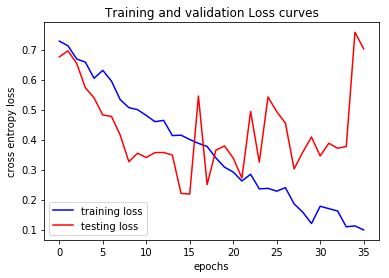

In [31]:
plt.plot(history_record[0].history['loss'],color='b',label='training loss')
plt.plot(history_record[0].history['val_loss'],color='r',label='testing loss')
plt.xlabel('epochs')
plt.ylabel('cross entropy loss')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('posture-loss-simple.jpg')
plt.show()

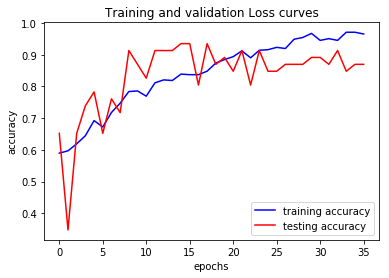

In [32]:
plt.plot(history_record[0].history['acc'],color='b',label='training accuracy')
plt.plot(history_record[0].history['val_acc'],color='r',label='testing accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and validation Loss curves')
plt.legend()
plt.savefig('posture-accuracy-simple.jpg')
plt.show()